In [1]:
import utils
import pandas as pd
from pprint import pprint
import json
import numpy as np
import seaborn as sns
from statsmodels.stats.proportion import proportion_confint

sns.set()

In [2]:
answers, answers_flat, quizzes = utils.load_latest_answers()

Loading answers.log...
Loading quizzes...
Loaded!


In [3]:
len(answers.sessionId.unique())

8812

In [4]:
answers

,sessionId,quizName,quizHash,commitHash,timestamp,answers,attempt,version,frac_correct
0,000c8280-89d2-4b11-b4f7-daf0d82519de,ch01-01-installation,5887e990f359650205e3ff4d07f9d3ea,b931770a26ce5e1238c425f87afd377aad15587b,2022-12-03 19:37:10.254,"[{'answer': {'answer': 'Rustup'}, 'correct': T...",0.0,1,1.000000
1,000c8280-89d2-4b11-b4f7-daf0d82519de,ch01-02-hello-world,fc689a30de5e6afb6636826479d79499,b931770a26ce5e1238c425f87afd377aad15587b,2022-12-03 19:38:52.836,"[{'answer': {'answer': 'Main'}, 'correct': Tru...",0.0,1,1.000000
2,000c8280-89d2-4b11-b4f7-daf0d82519de,ch01-03-hello-cargo,ceb80f78efb994298f49b0750499f8f7,b931770a26ce5e1238c425f87afd377aad15587b,2022-12-03 19:41:00.163,[{'answer': {'answer': 'Cargo watches for file...,0.0,2,1.000000
3,000fcc6b-0135-4ae5-b1a0-8d0dc93b469a,ch01-01-installation,5887e990f359650205e3ff4d07f9d3ea,a138bdcaf47989f801528e3a68526f7834db2dd9,2022-11-23 16:23:55.769,"[{'answer': {'answer': 'shell'}, 'correct': Fa...",0.0,1,0.000000
4,001944e5-eb30-4314-96af-5310882eb8a3,ch01-01-installation,5887e990f359650205e3ff4d07f9d3ea,a138bdcaf47989f801528e3a68526f7834db2dd9,2022-11-18 00:27:22.070,"[{'answer': {'answer': 'Rustup'}, 'correct': T...",0.0,1,1.000000
...,...,...,...,...,...,...,...,...,...
57711,ffe3cd6f-37ee-470b-a535-00f746a6102b,ch03-01-variables-and-mutability-sec2-constants,ba462055a48ebd3d066fb8b54fb19c5a,a138bdcaf47989f801528e3a68526f7834db2dd9,2022-11-19 01:45:08.845,[{'answer': {'answer': 'A `const` can only be ...,0.0,2,0.000000
57712,ffe3cd6f-37ee-470b-a535-00f746a6102b,ch03-01-variables-and-mutability-sec3-shadowing,dcd1ff8bfa3d3cd2ea85b1eb2004ca5b,a138bdcaf47989f801528e3a68526f7834db2dd9,2022-11-19 01:48:01.002,[{'answer': {'answer': 'Shadowing requires you...,0.0,1,0.000000
57713,ffe3cd6f-37ee-470b-a535-00f746a6102b,ch03-02-data-types-sec1-scalar,ac9fab00d732bfba82af971b8a17681c,a138bdcaf47989f801528e3a68526f7834db2dd9,2022-11-19 01:33:02.684,"[{'answer': {'answer': '2<sup>128</sup> - 1'},...",0.0,1,0.333333
57714,ffe3cd6f-37ee-470b-a535-00f746a6102b,ch03-02-data-types-sec2-compound,5698743e6e8652a373a4c640bb9f2965,a138bdcaf47989f801528e3a68526f7834db2dd9,2022-11-19 01:55:01.420,"[{'answer': {'doesCompile': True, 'stdout': 'T...",0.0,2,0.000000


In [5]:
answers_flat['answerHash'] = answers_flat.answer.map(lambda a: hash(frozenset(a.items())))

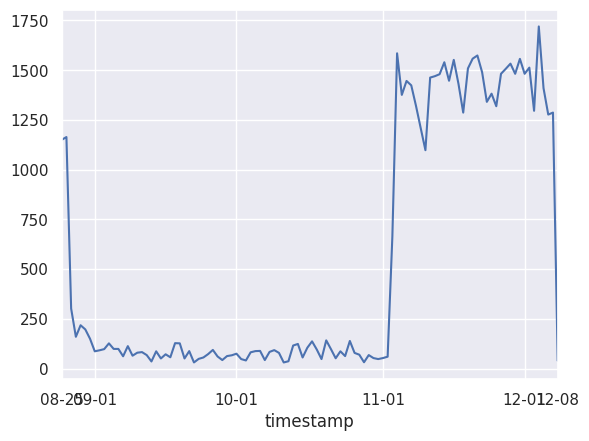

In [6]:
from matplotlib.dates import DateFormatter

ax = answers.set_index('timestamp').resample('D').size().plot.line()
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

<AxesSubplot:xlabel='timestamp'>

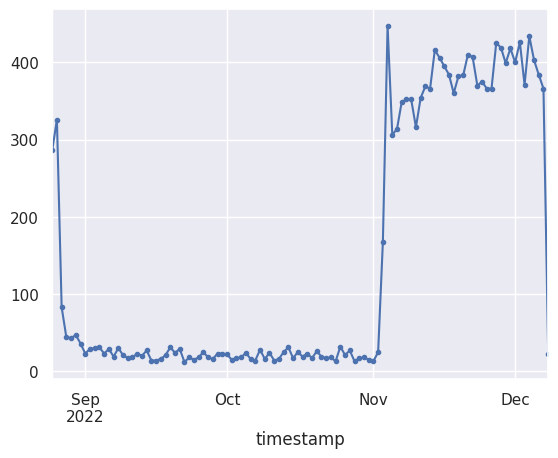

In [7]:
daily_users = answers.set_index('timestamp').resample('D').apply(lambda df: len(df.sessionId.unique()))
# daily_users.loc['2022-09-01':].rolling(7).mean().plot.line(style='.-')
daily_users.plot.line(style='.-')

In [8]:
QS = [
    "5080616f-6f4c-43f7-aa3a-8b23f2798937",
    "e8da8773-8df2-4279-8c27-b7e9eda1dddd",
    "1e4f082c-ffa4-4d33-8726-2dbcd72e1aa2",
    "7fbda6e4-dca7-458e-ab52-fab03181f90b",
    "f1ab2171-96f0-4380-b16d-9055a9a00415",
    "6028c7f5-b373-475f-ba43-553773c7b3b7",
    "6a94bc90-6cc5-4a47-838c-596d3747b7e4",
    "40ae0cfe-3567-4d05-b0d9-54d612a2d654",
    "d03748df-8dcf-4ec8-bd30-341927544665",
    "694bb2d0-f2e6-4b0b-a3e7-2d9f9e8b3d09",
    "a2a1546b-27bf-47d2-a1bc-86d777573f40"
]

In [9]:
def print_q(qid):
    df = answers_flat[(answers_flat.id == qid) & (answers_flat.explanation)]
    if len(df) == 0: return
    row = df.iloc[0]
    print(row.quizName, row.question+1)
    
    def print_explanations(correct):
        df2 = df[df.correct_v2 == correct]
        hashes = df2.groupby('answerHash').size().sort_values(ascending=False).index.tolist()
        for h in hashes:
            rows = df2[df2.answerHash == h]
            answer = rows.iloc[0].answer
            print(f"ANSWSER (N={len(rows)}):", answer)
            print("EXPLANATIONS:")
            for _, row in rows.iterrows():
                print(row.explanation)
                print()
            
            
#         for _, row in :
#             print(row.answer)
#             print(row.explanation)
#             print()
            
#     print('CORRECT:')
#     print_explanations(True)
    print('INCORRECT:')
    print_explanations(False)
    print("="*30)
    

print_q("6a94bc90-6cc5-4a47-838c-596d3747b7e4")

ch07-05-files 1
INCORRECT:
ANSWSER (N=27): {'answer': 'foobar::engine::analysis::run'}
EXPLANATIONS:
;

pass

 

Name of the crate is foobar, run is in engine::analysis

idk

I chose as it is the path to the run function if accessed as a library. I think

full path from crate name foobar

`foobar` is crate (like `rand`), which defines `engine`, which in turn defines `analysis`, which in turn defines `run`.

run is in analysis which is in engine which is in foobar

...

lib.rs declares the engine module in the root crate, then engine declares analysis as its child and then analysis declares the function run within itself.

go through hierarchy

Because that's where it is

foobar is the package. engine is a module defined in the package. analysis is the sub-module of analysis.

We need to include the full path to the "run" function, which is defined in "analysis" module.

I pick this sentence by roughly following the filesystem structure because it is related to the module structure

Ful

# Quiz-level performance

In [10]:
def ci(ser):
    mu = ser.mean()
    sigma = ser.sem()
    return f'{mu:.02f} ± {2*sigma:.02f} (N = {len(ser)})'
answers.groupby(['quizName', 'version']).frac_correct.apply(ci)

quizName                   version
ch01-01-installation       0          0.75 ± 0.02 (N = 1600)
                           1          0.71 ± 0.02 (N = 3462)
ch01-02-hello-world        0          0.91 ± 0.01 (N = 1453)
                           1          0.92 ± 0.01 (N = 3408)
ch01-03-hello-cargo        0          0.89 ± 0.01 (N = 1137)
                                               ...          
ch11-02-running-tests      0             0.33 ± 0.33 (N = 3)
                           1            0.42 ± 0.07 (N = 46)
                           2           0.44 ± 0.04 (N = 179)
ch11-03-test-organization  0            0.69 ± 0.13 (N = 49)
                           1           0.55 ± 0.08 (N = 172)
Name: frac_correct, Length: 123, dtype: object

In [11]:
answers.groupby('quizName').frac_correct.describe()[['count', 'mean', '50%']].sort_values('quizName')

,count,mean,50%
quizName,,,
ch01-01-installation,5062.0,0.720071,1.000000
ch01-02-hello-world,4861.0,0.917610,1.000000
ch01-03-hello-cargo,4102.0,0.669795,1.000000
ch03-01-variables-and-mutability-sec1-variables,3034.0,0.960778,1.000000
ch03-01-variables-and-mutability-sec2-constants,2763.0,0.710098,1.000000
ch03-01-variables-and-mutability-sec3-shadowing,2707.0,0.549317,0.500000
ch03-02-data-types-sec1-scalar,2265.0,0.594702,0.666667
ch03-02-data-types-sec2-compound,2142.0,0.590803,0.500000
ch03-03-functions-sec1-parameters,1900.0,0.774737,1.000000


## Intervention analysis

In [17]:
import subprocess as sp

TAGS = ['ownership-incompleteness', 'borrow-promotion', 'intervention-01', "moved-match-questions"]

commit_tags = {
    tag: utils.date_for_commit(sp.check_output(f'git rev-list -n 1 {tag}', shell=True, cwd=utils.QUIZ_DIR).decode('utf-8').strip())
    for tag in TAGS
}

In [18]:
interventions = [
    (('ch04-01-ownership-sec1-move', 3), ('ch04-01-ownership-sec3-functions', 2), 'ownership-incompleteness'),
    (('ch04-02-references-sec2-mut', 0), ('ch04-02-references-sec2-mut', 0), 'borrow-promotion')
]

for (before, after, tag) in interventions:
    def f(q, prior):
        df = answers_flat
        (quiz, question) = q
        df = df[(df.quizName == quiz) & (df.question == question)]
        df = df[df.timestamp.dt.date < commit_tags[tag].date()] if prior else df[df.timestamp.dt.date >= commit_tags[tag].date()]
        low, upp = proportion_confint(df.correct_v2.sum(), len(df))
        print(f'prior={prior}, N={len(df)}, {df.correct_v2.mean()}, correct=[{low:.02}-{upp:.02}]')
        
    print(tag)
    f(before, True)
    f(after, False)


ownership-incompleteness
prior=True, N=89, 0.550561797752809, correct=[0.45-0.65]
prior=False, N=1474, 0.771370420624152, correct=[0.75-0.79]
borrow-promotion
prior=True, N=62, 0.5, correct=[0.38-0.62]
prior=False, N=1238, 0.49353796445880455, correct=[0.47-0.52]


In [26]:
def cohens_d(x1, x2):
    n1, n2 = len(x1), len(x2)
    sd_pooled = np.sqrt((n1-1) * np.std(x1)**2 + (n2-1) * np.std(x2)**2) / (n1+n2-2)
    return (x2.mean() - x1.mean()) / sd_pooled

In [21]:
from scipy.stats import ttest_ind

In [31]:
interventions = [
    ("5080616f-6f4c-43f7-aa3a-8b23f2798937", "intervention-01"),
    ("7fbda6e4-dca7-458e-ab52-fab03181f90b", "intervention-01"),
    ("e8da8773-8df2-4279-8c27-b7e9eda1dddd", "intervention-01"),
    ("f1ab2171-96f0-4380-b16d-9055a9a00415", "intervention-01"),
    ("0aad53ff-89d7-4d14-8e3d-c17809220252", "intervention-01"),
    ("694bb2d0-f2e6-4b0b-a3e7-2d9f9e8b3d09", "intervention-01"),
    ("d03748df-8dcf-4ec8-bd30-341927544665", "intervention-01"),
    
    ("1e4f082c-ffa4-4d33-8726-2dbcd72e1aa2", "moved-match-questions"),
]

effects = []
for (qid, tag) in interventions:
    def f(after):
        df = answers_flat
        df = df[df.id == qid]
        df = df[df.timestamp.dt.date >= commit_tags[tag].date()] if after else df[df.timestamp.dt.date < commit_tags[tag].date()]
        low, upp = proportion_confint(df.correct_v2.sum(), len(df))
        print(f'after={after}, N={len(df)}, {df.correct_v2.mean():.02}, correct=[{low:.02}-{upp:.02}]')
        return df.correct_v2
        
    row = answers_flat[answers_flat.id == qid].iloc[0]
    print(row.quizName, row.question+1, tag)
    before = f(False)
    after = f(True)
    
    effect = after.mean() - before.mean()
    p = ttest_ind(before, after).pvalue
    print(f'effect={effect:.03}, p={p:.03}')
    if p < 0.05: effects.append(effect)
    
    print()

avg_effect = np.mean(effects)
print(f'Nsig={len(effects)}, avg_effect={avg_effect}')

ch04-02-references-sec2-mut 1 intervention-01
after=False, N=658, 0.5, correct=[0.46-0.54]
after=True, N=341, 0.52, correct=[0.47-0.58]
effect=0.0205, p=0.54

ch04-03-slices 1 intervention-01
after=False, N=575, 0.23, correct=[0.2-0.27]
after=True, N=297, 0.39, correct=[0.34-0.45]
effect=0.161, p=5.68e-07

ch08-01-vec 4 intervention-01
after=False, N=311, 0.15, correct=[0.11-0.19]
after=True, N=120, 0.2, correct=[0.13-0.27]
effect=0.0457, p=0.256

ch08-02-string-sec1 2 intervention-01
after=False, N=265, 0.13, correct=[0.091-0.17]
after=True, N=106, 0.25, correct=[0.17-0.34]
effect=0.123, p=0.00415

ch10-01-generics 1 intervention-01
after=False, N=234, 0.35, correct=[0.29-0.41]
after=True, N=103, 0.39, correct=[0.29-0.48]
effect=0.0422, p=0.458

ch10-01-generics 3 intervention-01
after=False, N=234, 0.29, correct=[0.24-0.35]
after=True, N=103, 0.62, correct=[0.53-0.72]
effect=0.326, p=8e-09

ch10-03-lifetimes-sec2 3 intervention-01
after=False, N=177, 0.26, correct=[0.2-0.32]
after=Tr

# Question-level performance

In [15]:

for quiz_name, versions in sorted(quizzes.quizzes.items(), key=lambda t: t[0]):
    schema = max(versions['schemas'].values(), key=lambda d: d['version'])['schema']
    quiz_answers = answers[answers.quizName == quiz_name]
    N = len(quiz_answers)
    if N < 2: continue
    
    meta = [
        {
            'n': 0,
            'bad_answers': []
        } 
        for _ in range(len(schema['questions']))
    ]
    for user_answers in quiz_answers.answers:
        for i, answer in enumerate(user_answers):
            m = meta[i]
            if answer['correct']:
                m['n'] += 1
            else:
                m['bad_answers'].append(answer['answer'])
    
    
    print(f'{"="*10} QUIZ: {quiz_name} {"="*10}')
    for i, q in enumerate(schema['questions']):
        m = meta[i]
        lower, upper = proportion_confint(m['n'], N)
        print(f"QUESTION {i+1}")
        print(f'%correct: {m["n"]/N:.02f} ([{lower:.02f} - {upper:.02f}], N = {N})')
        pprint(q['prompt'])
        print(m['bad_answers'])
        print()
    
    print('\n\n')

========== QUIZ: ch01-01-installation ==========
QUESTION 1
%correct: 0.72 ([0.71 - 0.73], N = 5062)
{'prompt': 'What is the name of the command-line tool for managing the version '
           'of Rust on your machine?'}
[{'answer': 'shell'}, {'answer': 'cargo'}, {'answer': 'cargo'}, {'answer': 'xcode-select'}, {'answer': 'rustc'}, {'answer': 'rustc'}, {'answer': 'rustc'}, {'answer': 'cargo'}, {'answer': 'rustc --version'}, {'answer': 'cargo'}, {'answer': 'cargo'}, {'answer': 'rustc --version'}, {'answer': 'cargo'}, {'answer': 'rustc'}, {'answer': 'cargo'}, {'answer': '1.0'}, {'answer': 'main'}, {'answer': 'cargo'}, {'answer': 'cargo'}, {'answer': 'rustc'}, {'answer': 'Rustc'}, {'answer': 'rustc'}, {'answer': 'cargo'}, {'answer': 'rustc'}, {'answer': 'cargo'}, {'answer': 'Cargo'}, {'answer': 'rustc —version'}, {'answer': 'rustup --v'}, {'answer': '$ rustc --version'}, {'answer': 'cargo'}, {'answer': 'Cargo'}, {'answer': 'Cargo'}, {'answer': 'rustup --version'}, {'answer': 'cargo'}, {'a

IndexError: list index out of range

# User-level performance

In [ ]:
answers.groupby('sessionId').frac_correct.describe()[['count', 'mean', '50%']].sort_values('count')